In [29]:
import gzip
import pickle
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

%matplotlib inline

In [16]:
#compute probabilities

In [17]:
h5_3L = h5py.File('ag1000g.crosses.phase1.ar3sites.3L.h5', 'r')
calldata_genotype = h5_3L['/3L/calldata/genotype']
MQ0 = h5_3L['/3L/variants/MQ0']
num_alleles = h5_3L['/3L/variants/num_alleles']
is_snp = h5_3L['/3L/variants/is_snp']
POS = h5_3L['/3L/variants/POS']
samples_hdf5 = list(map(lambda sample: sample.decode('utf-8'), h5_3L['/3L/samples']))

In [18]:
def get_family_indexes(samples_hdf5, cross_pd):
    offspring = []
    for i, individual in cross_pd.T.iteritems():
        index = samples_hdf5.index(individual.id)
        if individual.function == 'parent':
            if individual.sex == 'M':
                father = index
            else:
                mother = index
        else:
            offspring.append(index)
    return {'mother': mother, 'father': father, 'offspring': offspring}

In [19]:
samples = pd.read_csv('samples.tsv', sep='\t')
cross_pd = samples[samples['cross'] == 'cross-29-2']
family_indexes = get_family_indexes(samples_hdf5, cross_pd)

In [23]:
mendelian_errors = pickle.load(gzip.open('mendelian_errors.pickle.gz', 'rb'))

In [24]:
len(mendelian_errors), len(list(filter(lambda x: x[0] > 0,mendelian_errors.values())))

(60949, 4248)

In [25]:
def get_stats():
    error_mq0 = []
    ok_mq0 = []
    for i in acceptable_position_to_genotype():
        if i == 60000:
            break
        my_mendelian_errors = mendelian_errors.get(POS[i], (0, 0))
        if my_mendelian_errors[0] > 0:
            error_mq0.append(MQ0[i])
        else:
            ok_mq0.append(MQ0[i])
    return {
        'MQ0': {
            'errors': error_mq0,
            'OK': ok_mq0
        }
    }

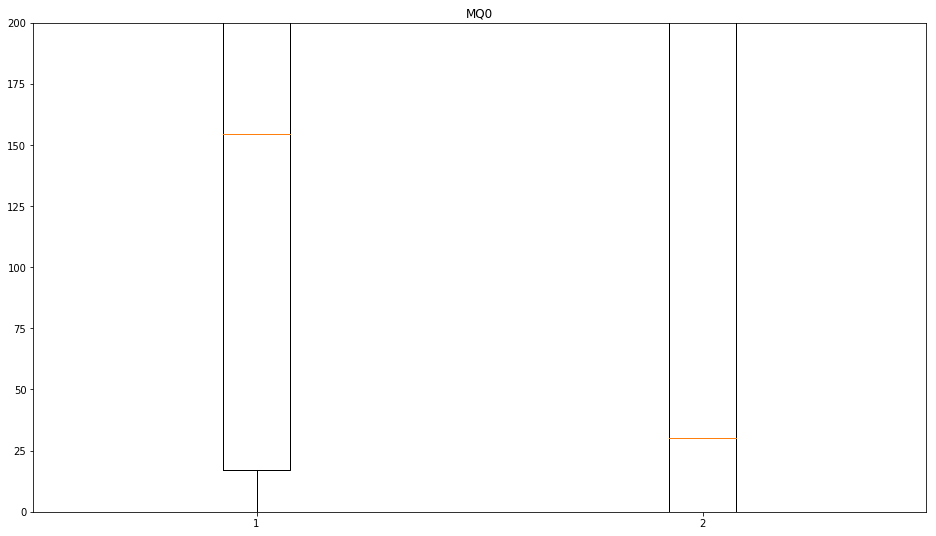

In [27]:
mendelian_stats = get_stats()
fig, axs = plt.subplots(1, 1, squeeze=False, sharex=True, figsize=(16, 9))
ax = axs[0][0]
MQ0_stats = mendelian_stats['MQ0']
ax.set_title('MQ0')
ax.boxplot([MQ0_stats['errors'], MQ0_stats['OK']])
ax.set_ylim(0, 200)
pass

In [ ]:
#Stats by position

In [13]:
import numpy as np
a = np.array([[-1, -1]])
np.where(a==-1)

(array([0, 0]), array([0, 1]))